In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df_pv = pd.DataFrame()

directory_path = f"{os.getcwd()}/data"
files = os.listdir(directory_path)

for filename in files:
    if 'PV' in filename:
        print(f"Reading {filename}")
        df_temp = pd.read_excel(f"{directory_path}/{filename}", parse_dates=["Datetime"])
        df_pv = pd.concat([df_pv, df_temp])

display(df_pv.head())
del df_temp

Reading Sunlab-Faro-PV-2014.xlsx
Reading Sunlab-Faro-PV-2015.xlsx
Reading Sunlab-Faro-PV-2016.xlsx
Reading Sunlab-Faro-PV-2017.xlsx


,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,B_Vertical - Power DC [W],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Horizontal - Voltage DC [V],B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ÂºC],B_Optimal - Temperature [ÂºC],B_Horizontal - Temperature [ÂºC]
0,2014-11-15 13:21:00+00:00,28.7,6.0100,172.48700,27.85,7.0300,195.785500,29.00,4.4125,127.962500,...,178.211625,27.50,7.0425,193.66875,28.45,4.3750,124.468750,36.4,36.4,29.5
1,2014-11-15 13:23:00+00:00,28.4,6.0375,171.46500,27.85,7.0200,195.507000,29.00,4.3925,127.382500,...,179.733000,27.30,7.0725,193.07925,28.35,4.3675,123.818625,36.7,36.9,29.6
2,2014-11-15 13:26:00+00:00,28.7,5.9975,172.12825,28.05,6.9925,196.139625,28.85,4.4025,127.012125,...,179.918125,27.60,7.0150,193.61400,28.35,4.3575,123.535125,35.3,36.0,28.7
3,2014-11-15 13:29:00+00:00,28.8,5.9300,170.78400,28.15,6.9300,195.079500,29.15,4.3175,125.855125,...,178.730625,27.60,6.9525,191.88900,28.45,4.2975,122.263875,34.5,35.0,28.1
4,2014-11-15 13:32:00+00:00,28.8,5.8050,167.18400,28.95,6.5525,189.694875,29.15,4.2200,123.013000,...,174.942500,27.75,6.7650,187.72875,28.35,4.2125,119.424375,34.3,34.7,28.0


In [ ]:
df_pv.sort_values(by='Datetime', inplace=True)

# Dataset contains modules in vertical and horizontal orientations, we don't need this data
#  so drop the columns
for col_name in list(df_pv):
    if ('Vertical' in col_name) or ('Horizontal' in col_name):
        df_pv.drop(columns=col_name, inplace=True)
    # Remove special chars in Temperatire
    if 'Âº' in col_name:
        new_col_name = col_name[:-4] + 'C]'
        df_pv.rename(columns={col_name : new_col_name}, inplace=True)

display(df_pv.head(10))
display(df_pv.tail(10))

,Datetime,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [C],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [C]
73017,2014-01-01 07:41:00+00:00,14.6,0.19527,2.850946,9.4,NaN,NaN,NaN,9.7
73015,2014-01-01 07:42:00+00:00,23.1,0.07250,1.674750,9.4,18.30,0.130512,2.388366,9.7
73013,2014-01-01 07:43:00+00:00,23.1,0.07500,1.732500,9.4,22.35,0.052500,1.173375,9.7
155574,2014-01-01 07:44:00+00:00,23.1,0.07750,1.790250,9.5,24.35,0.052500,1.278375,9.7
155572,2014-01-01 07:45:00+00:00,22.2,0.08250,1.831500,9.5,25.25,0.052500,1.325625,9.7
171009,2014-01-01 07:46:00+00:00,23.0,0.08500,1.955000,9.5,29.80,0.012500,0.372500,9.8
155573,2014-01-01 07:47:00+00:00,23.0,0.08750,2.012500,9.5,29.95,0.012500,0.374375,9.8
50562,2014-01-01 07:48:00+00:00,23.1,0.09250,2.136750,9.5,30.15,0.010000,0.301500,9.8
157042,2014-01-01 07:49:00+00:00,23.1,0.09750,2.252250,9.5,30.35,0.010000,0.303500,9.8
73011,2014-01-01 07:50:00+00:00,23.0,0.10500,2.415000,9.5,30.50,0.012500,0.381250,9.8


,Datetime,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [C],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [C]
88872,2017-12-31 17:09:00+00:00,NaN,NaN,NaN,17.8,NaN,NaN,NaN,18.5
88873,2017-12-31 17:10:00+00:00,NaN,NaN,NaN,17.7,NaN,NaN,NaN,18.4
2083,2017-12-31 17:11:00+00:00,NaN,NaN,NaN,17.7,NaN,NaN,NaN,18.4
153090,2017-12-31 17:12:00+00:00,NaN,NaN,NaN,17.7,NaN,NaN,NaN,18.4
45840,2017-12-31 17:13:00+00:00,NaN,NaN,NaN,17.7,NaN,NaN,NaN,18.3
204164,2017-12-31 17:14:00+00:00,NaN,NaN,NaN,17.6,NaN,NaN,NaN,18.2
97760,2017-12-31 17:15:00+00:00,NaN,NaN,NaN,17.6,NaN,NaN,NaN,18.2
204166,2017-12-31 17:16:00+00:00,NaN,NaN,NaN,17.5,NaN,NaN,NaN,18.1
45841,2017-12-31 17:17:00+00:00,NaN,NaN,NaN,17.4,NaN,NaN,NaN,18.1
201027,2017-12-31 17:18:00+00:00,NaN,NaN,NaN,17.4,NaN,NaN,NaN,18.0


We see that the temperature reports for several minutes after power stops being generated.  For both A and B invividually, if all V, A, and W are NaN but Temp is not, let's replace these with 0.

In [19]:
print(df_pv.dtypes)


for module_name in ['A', 'B']:
    df_pv[f"{module_name}_Optimal - Voltage DC [V]"] = \
        np.where(np.isnan(df_pv[f"{module_name}_Optimal - Voltage DC [V]"]) & \
        np.isnan(df_pv[f"{module_name}_Optimal - Current DC [A]"]) & \
        np.isnan(df_pv[f"{module_name}_Optimal - Power DC [W]"]) & \
        ~np.isnan(df_pv[f"{module_name}_Optimal - Temperature [C]"]), \
        0, df_pv[f"{module_name}_Optimal - Voltage DC [V]"])
    df_pv[f"{module_name}_Optimal - Current DC [A]"] = \
        np.where(df_pv[f"{module_name}_Optimal - Voltage DC [V]"] == 0 & \
        np.isnan(df_pv[f"{module_name}_Optimal - Current DC [A]"]) & \
        np.isnan(df_pv[f"{module_name}_Optimal - Power DC [W]"]) & \
        ~np.isnan(df_pv[f"{module_name}_Optimal - Temperature [C]"]), \
        0, df_pv[f"{module_name}_Optimal - Current DC [A]"])
    df_pv[f"{module_name}_Optimal - Power DC [W]"] = \
        np.where(df_pv[f"{module_name}_Optimal - Current DC [A]"] == 0 & \
        np.isnan(df_pv[f"{module_name}_Optimal - Power DC [W]"]) & \
        ~np.isnan(df_pv[f"{module_name}_Optimal - Temperature [C]"]), \
        0, df_pv[f"{module_name}_Optimal - Power DC [W]"])

display(df_pv.tail(10))


Datetime                       datetime64[ns, UTC]
A_Optimal - Voltage DC [V]                 float64
A_Optimal - Current DC [A]                 float64
A_Optimal - Power DC [W]                   float64
A_Optimal - Temperature [C]                float64
B_Optimal - Voltage DC [V]                 float64
B_Optimal - Current DC [A]                 float64
B_Optimal - Power DC [W]                   float64
B_Optimal - Temperature [C]                float64
dtype: object


,Datetime,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [C],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [C]
88872,2017-12-31 17:09:00+00:00,0.0,0.0,0.0,17.8,0.0,0.0,0.0,18.5
88873,2017-12-31 17:10:00+00:00,0.0,0.0,0.0,17.7,0.0,0.0,0.0,18.4
2083,2017-12-31 17:11:00+00:00,0.0,0.0,0.0,17.7,0.0,0.0,0.0,18.4
153090,2017-12-31 17:12:00+00:00,0.0,0.0,0.0,17.7,0.0,0.0,0.0,18.4
45840,2017-12-31 17:13:00+00:00,0.0,0.0,0.0,17.7,0.0,0.0,0.0,18.3
204164,2017-12-31 17:14:00+00:00,0.0,0.0,0.0,17.6,0.0,0.0,0.0,18.2
97760,2017-12-31 17:15:00+00:00,0.0,0.0,0.0,17.6,0.0,0.0,0.0,18.2
204166,2017-12-31 17:16:00+00:00,0.0,0.0,0.0,17.5,0.0,0.0,0.0,18.1
45841,2017-12-31 17:17:00+00:00,0.0,0.0,0.0,17.4,0.0,0.0,0.0,18.1
201027,2017-12-31 17:18:00+00:00,0.0,0.0,0.0,17.4,0.0,0.0,0.0,18.0


<Axes: >

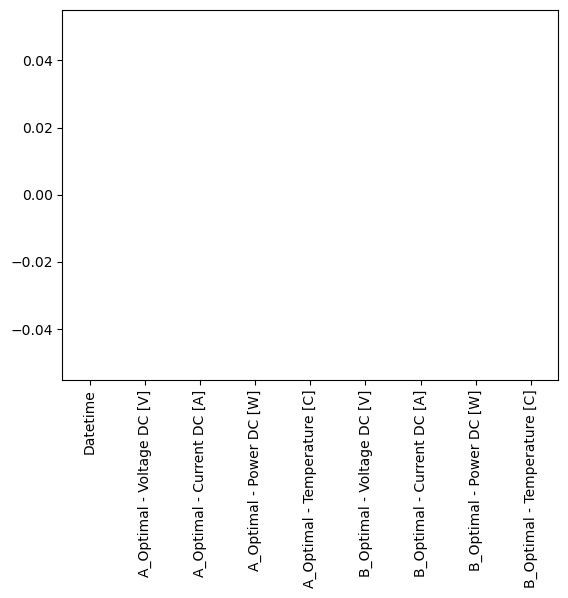

In [20]:
# Plot the columns with missing data
df_pv.isna().sum().plot.bar()

In [21]:
print(df_pv.dtypes)
print(len(df_pv))

Datetime                       datetime64[ns, UTC]
A_Optimal - Voltage DC [V]                 float64
A_Optimal - Current DC [A]                 float64
A_Optimal - Power DC [W]                   float64
A_Optimal - Temperature [C]                float64
B_Optimal - Voltage DC [V]                 float64
B_Optimal - Current DC [A]                 float64
B_Optimal - Power DC [W]                   float64
B_Optimal - Temperature [C]                float64
dtype: object
889611


In [22]:
df_meteo = pd.DataFrame()

directory_path = f"{os.getcwd()}/data"
files = os.listdir(directory_path)

for filename in files:
    if 'Meteo' in filename:
        print(f"Reading {filename}")
        df_temp = pd.read_excel(f"{directory_path}/{filename}", parse_dates=["Datetime"])
        df_meteo = pd.concat([df_meteo, df_temp])

display(df_meteo.head())
display(df_meteo.tail())
del df_temp

Reading Sunlab-Faro-Meteo-2016.xlsx
Reading Sunlab-Faro-Meteo-2017.xlsx
Reading Sunlab-Faro-Meteo-2014.xlsx
Reading Sunlab-Faro-Meteo-2015.xlsx


,Datetime,Ambient Temperature [ÂºC],Global Radiation [W/m2],Direct Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa],Diffuse Radiation [W/m2]
0,2016-06-18 02:08:00+00:00,18.300002,1.194936,1.686657,0.510547,2.450000,1.966250,NaN,NaN,NaN
1,2016-06-13 04:48:00+00:00,20.699998,1.263017,1.685188,0.525626,1.783333,302.993400,NaN,NaN,NaN
2,2016-06-18 02:12:00+00:00,18.300002,1.589771,1.702156,0.506136,2.300000,5.415977,NaN,NaN,NaN
3,2016-06-13 04:57:00+00:00,20.600000,1.686910,1.680664,0.562681,2.100000,308.656800,NaN,NaN,NaN
4,2016-06-13 04:59:00+00:00,20.600000,2.294155,2.090869,0.579536,2.416667,311.338020,NaN,NaN,NaN


,Datetime,Ambient Temperature [ÂºC],Global Radiation [W/m2],Direct Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa],Diffuse Radiation [W/m2]
437154,2015-01-18 00:53:00+00:00,12.083334,1.083412,NaN,0.514208,2.400000,198.72918,NaN,NaN,1.629623
437155,2015-01-05 11:12:00+00:00,13.283334,482.288600,NaN,24.643836,2.016667,128.98944,NaN,NaN,146.179040
437156,2015-04-16 03:30:00+00:00,11.400002,2.359275,NaN,0.512612,1.183333,278.83356,NaN,NaN,2.056315
437157,2015-04-16 03:36:00+00:00,11.600000,1.622945,NaN,0.510117,1.550000,278.16684,NaN,NaN,1.648008
437158,2015-04-16 03:42:00+00:00,11.900002,0.968877,NaN,0.508306,1.633333,300.85648,NaN,NaN,1.640297


In [23]:
df_meteo.sort_values(by='Datetime', inplace=True)

if 'Ambient Temperature [ÂºC]' in list(df_meteo):
    df_meteo.rename(columns={'Ambient Temperature [ÂºC]' : 'Ambient Temperature [C]'}, inplace=True)

if 'Wind Direction [Âº]' in list(df_meteo):
    df_meteo.rename(columns={'Wind Direction [Âº]' : 'Wind Direction [Deg]'}, inplace=True)

display(df_meteo.head())
display(df_meteo.tail())

,Datetime,Ambient Temperature [C],Global Radiation [W/m2],Direct Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Deg],Precipitation [mm],Atmospheric pressure [hPa],Diffuse Radiation [W/m2]
403992,2014-01-01 00:00:00+00:00,15.300000,1.406050,NaN,0.508442,2.300000,232.00156,NaN,NaN,1.649239
320933,2014-01-01 00:01:00+00:00,15.300000,1.365813,NaN,0.507736,2.416667,227.50672,NaN,NaN,1.645474
309864,2014-01-01 00:02:00+00:00,15.283334,1.406155,NaN,0.508740,2.500000,219.86790,NaN,NaN,1.649413
522668,2014-01-01 00:03:00+00:00,15.300000,1.293696,NaN,0.508438,2.850000,222.98490,NaN,NaN,1.645420
440864,2014-01-01 00:04:00+00:00,15.300000,1.474050,NaN,0.508635,2.500000,228.94006,NaN,NaN,1.645991


,Datetime,Ambient Temperature [C],Global Radiation [W/m2],Direct Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Deg],Precipitation [mm],Atmospheric pressure [hPa],Diffuse Radiation [W/m2]
466384,2017-12-31 22:56:00+00:00,11.183334,1.438274,NaN,0.511621,1.550000,23.833832,0.0,1031.8,1.652189
8597,2017-12-31 22:57:00+00:00,11.066668,1.540152,NaN,0.510003,2.600000,32.833642,0.0,1031.8,1.649827
140253,2017-12-31 22:58:00+00:00,10.816666,2.439068,NaN,0.509911,2.516667,29.333310,0.0,1031.8,2.055011
140255,2017-12-31 22:59:00+00:00,10.700000,2.424758,NaN,0.509218,1.766667,29.333292,0.0,1031.8,2.389069
278049,2017-12-31 23:00:00+00:00,10.700000,2.493029,NaN,0.508710,1.950000,29.999848,0.0,1031.8,2.346746


If we have an Temperature reading, assume NaN Precipitation is zero

In [24]:
df_meteo['Precipitation [mm]'] = \
    np.where(np.isnan(df_meteo['Precipitation [mm]']) & \
             ~np.isnan(df_meteo['Ambient Temperature [C]']), 0, df_meteo['Precipitation [mm]'])

display(df_meteo.tail())

,Datetime,Ambient Temperature [C],Global Radiation [W/m2],Direct Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Deg],Precipitation [mm],Atmospheric pressure [hPa],Diffuse Radiation [W/m2]
466384,2017-12-31 22:56:00+00:00,11.183334,1.438274,NaN,0.511621,1.550000,23.833832,0.0,1031.8,1.652189
8597,2017-12-31 22:57:00+00:00,11.066668,1.540152,NaN,0.510003,2.600000,32.833642,0.0,1031.8,1.649827
140253,2017-12-31 22:58:00+00:00,10.816666,2.439068,NaN,0.509911,2.516667,29.333310,0.0,1031.8,2.055011
140255,2017-12-31 22:59:00+00:00,10.700000,2.424758,NaN,0.509218,1.766667,29.333292,0.0,1031.8,2.389069
278049,2017-12-31 23:00:00+00:00,10.700000,2.493029,NaN,0.508710,1.950000,29.999848,0.0,1031.8,2.346746


0.7881203568642084


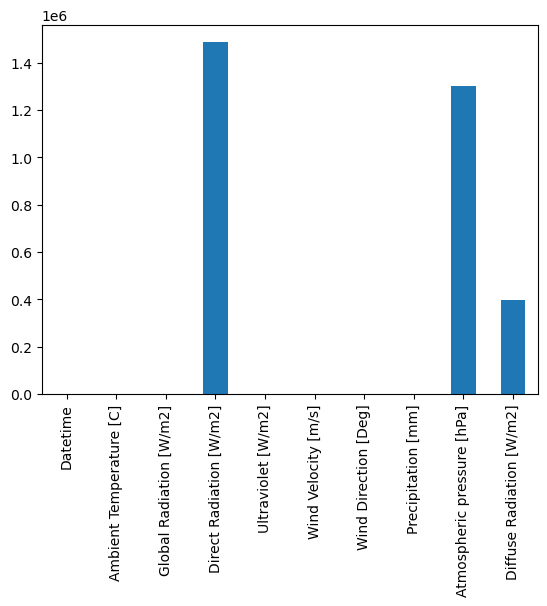

In [25]:
df_meteo.isna().sum().plot.bar()

# See what precentage is Null
print(df_meteo['Direct Radiation [W/m2]'].isna().sum() / len(df_meteo['Direct Radiation [W/m2]']))

In [26]:
# Due to the large numbers of NaN, let's remove those three columns
df_meteo.drop(columns=['Direct Radiation [W/m2]', 'Atmospheric pressure [hPa]', 'Diffuse Radiation [W/m2]'], inplace=True)

<Axes: >

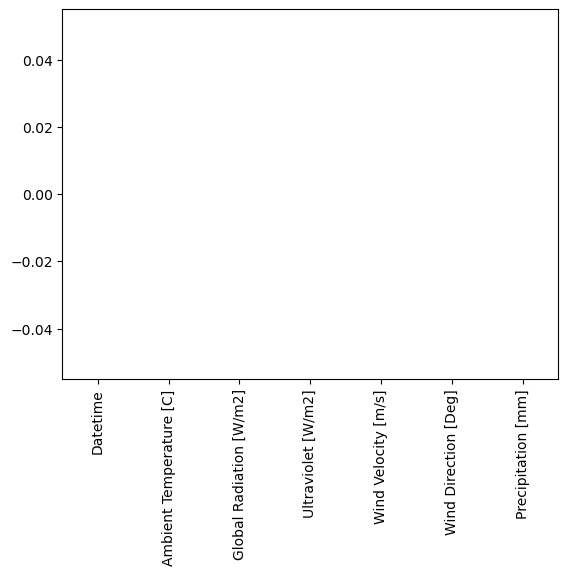

In [27]:
df_meteo.isna().sum().plot.bar()

Datetime                   datetime64[ns, UTC]
Ambient Temperature [C]                float64
Global Radiation [W/m2]                float64
Ultraviolet [W/m2]                     float64
Wind Velocity [m/s]                    float64
Wind Direction [Deg]                   float64
Precipitation [mm]                     float64
dtype: object
889611 1886656 889612


<Axes: xlabel='Date'>

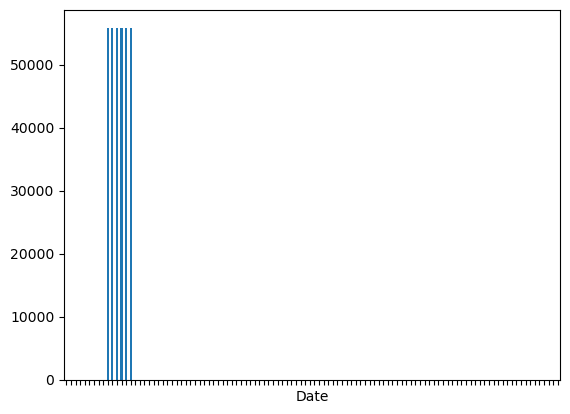

In [28]:
df_meteo['Datetime'] = pd.to_datetime(df_meteo['Datetime'], utc=True)

print(df_meteo.dtypes)

df_combined = pd.merge(df_pv, df_meteo, on='Datetime', how='left')

print(len(df_pv), len(df_meteo), len(df_combined))

df_combined.isna().sum().plot.bar()

# Get NaN in seperate df
df_nan = df_combined.loc[df_combined['Ambient Temperature [C]'].isna()].copy()

df_nan['Date'] = df_nan['Datetime'].dt.date
nan_by_day = df_nan.groupby('Date').size()

plt.xticks(visible=False)
nan_by_day.plot.bar(visible=False)

In [29]:
# Most of the missing data is bunched up, let's remove
df_combined.dropna(inplace=True)

# Remove timezone from datetime
df_combined['Datetime'] = df_combined['Datetime'].dt.tz_localize(None)

df_combined.to_csv('SunLab_Faro_Cleaned_mjs.csv', index=False)

In [30]:
# https://pandas.pydata.org/docs/reference/series.html

df = df_combined.copy()

# Add day of year as int
df['day_of_year'] = df['Datetime'].dt.dayofyear

# Convert hour and minute to float rounded to three decimal places
df['hour_and_minute'] = (df['Datetime'].dt.hour + (df['Datetime'].dt.minute / 60)).round(3)

display(df[['Datetime', 'day_of_year', 'hour_and_minute']].head())

,Datetime,day_of_year,hour_and_minute
0,2014-01-01 07:41:00,1,7.683
1,2014-01-01 07:42:00,1,7.700
2,2014-01-01 07:43:00,1,7.717
3,2014-01-01 07:44:00,1,7.733
4,2014-01-01 07:45:00,1,7.750


,Datetime,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [C],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [C],Ambient Temperature [C],Global Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Deg],Precipitation [mm],day_of_year,hour_and_minute
0,2014-01-01 07:41:00,14.6,0.19527,2.850946,9.4,0.00,0.000000,0.000000,9.7,9.7,7.131149,0.751824,0.700000,275.33384,0.0,1,7.683
1,2014-01-01 07:42:00,23.1,0.07250,1.674750,9.4,18.30,0.130512,2.388366,9.7,9.7,7.040442,0.781930,0.666667,278.50306,0.0,1,7.700
2,2014-01-01 07:43:00,23.1,0.07500,1.732500,9.4,22.35,0.052500,1.173375,9.7,9.7,6.594407,0.813929,0.616667,284.66712,0.0,1,7.717
3,2014-01-01 07:44:00,23.1,0.07750,1.790250,9.5,24.35,0.052500,1.278375,9.7,9.7,7.358729,0.849919,0.666667,278.66666,0.0,1,7.733
4,2014-01-01 07:45:00,22.2,0.08250,1.831500,9.5,25.25,0.052500,1.325625,9.7,9.7,7.470711,0.886891,0.633333,272.66636,0.0,1,7.750


Datetime                       datetime64[ns]
A_Optimal - Voltage DC [V]            float64
A_Optimal - Current DC [A]            float64
A_Optimal - Power DC [W]              float64
A_Optimal - Temperature [C]           float64
B_Optimal - Voltage DC [V]            float64
B_Optimal - Current DC [A]            float64
B_Optimal - Power DC [W]              float64
B_Optimal - Temperature [C]           float64
Ambient Temperature [C]               float64
Global Radiation [W/m2]               float64
Ultraviolet [W/m2]                    float64
Wind Velocity [m/s]                   float64
Wind Direction [Deg]                  float64
Precipitation [mm]                    float64
day_of_year                             int32
hour_and_minute                       float64
dtype: object


<Axes: >

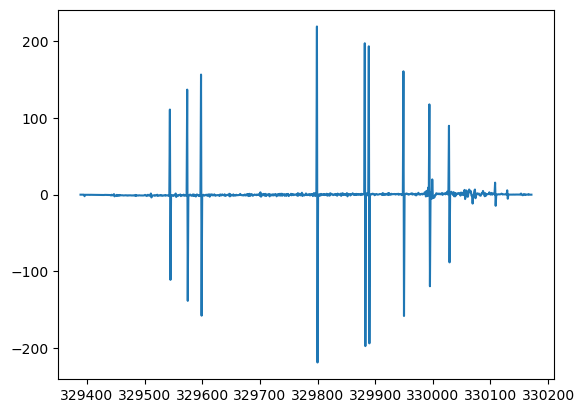

In [31]:
display(df.head())

print(df.dtypes)

df_temp = df.copy()

# Show wattage for a random day
df_temp['A_Optimal - Power DC [W]_diff'] = df_temp['A_Optimal - Power DC [W]'] - df_temp['A_Optimal - Power DC [W]'].shift(-1)
df_plot = df_temp.loc[(df_temp['Datetime'].dt.year == 2015) & (df_temp['day_of_year'] == 103)].copy()
df_plot['A_Optimal - Power DC [W]_diff'].plot()

<Axes: >

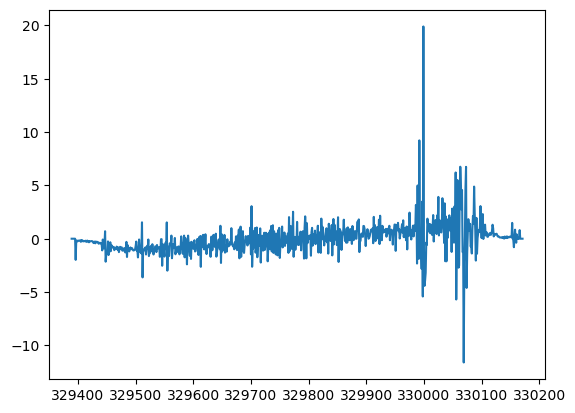

In [32]:
# If the reading is zero but the adjacent values are greater than zero, assume this is an error and average the two adjacent points

for col_name in list(df):
    if df[col_name].dtype == 'float64':
        df[col_name] = np.where(\
                            (df[col_name] == 0) & \
                            (df[col_name].shift(1) > 0) & \
                            (df[col_name].shift(-1) > 0), \
                            (df[col_name].shift(1) + df[col_name].shift(-1)) / 2, \
                            df[col_name])


# Show wattage for a random day
df_temp = df.copy()
df_temp['A_Optimal - Power DC [W]_diff'] = df_temp['A_Optimal - Power DC [W]'] - df_temp['A_Optimal - Power DC [W]'].shift(-1)
df_plot = df_temp.loc[(df_temp['Datetime'].dt.year == 2015) & (df_temp['day_of_year'] == 103)].copy()
df_plot['A_Optimal - Power DC [W]_diff'].plot()

In [33]:
# This function will shift the values in column named col_name by a number of minutes for creating additional y values
# We will do a 15 minute, 60 minute, and 1 day model
def shift_col_by_minutes(df, col_name, minute_shift):
    # Initial copy of dataframe with all columnm
    df_temp = df.copy()
    # Second copy of dataframe where we shift the columns
    df_temp_shift = df[['Datetime', col_name]].copy()

    # Shift time by minutes specified in parameters
    df_temp_shift['Datetime'] = df_temp_shift['Datetime'] - pd.Timedelta(minutes=minute_shift)

    # Create new column name for value being shifted and rename
    col_name_shift = col_name + '_shift_' + str(minute_shift)
    df_temp_shift.rename(columns={col_name : col_name_shift}, inplace=True)

    # Merge shifted dataframe with existing
    df_temp = pd.merge(df_temp, df_temp_shift[['Datetime', col_name_shift]], on='Datetime', how='left')

    # If we only shift by 15 or 60 minutes, we are concerned with the same day.  This will create values that are NaN at the end of the day
    # If we notice this we can assume these are zero as these are after the plant stopped generating data
    if minute_shift < 1440:
        df_temp[col_name_shift] = np.where(~(df_temp['Datetime'] + pd.Timedelta(minutes=minute_shift)).isin(df_temp['Datetime']), 0, df_temp[col_name_shift])

    return df_temp

In [34]:
# def add_y_by_minutes_shift(df, col_name, minute_shift):
for minute_shift in [15, 60, 1440]:
    for col_name in ['A_Optimal - Power DC [W]', 'B_Optimal - Power DC [W]']:
        print(f"Shifting {col_name} by {minute_shift} minutes")
        df = shift_col_by_minutes(df, col_name, minute_shift)

Shifting A_Optimal - Power DC [W] by 15 minutes
Shifting B_Optimal - Power DC [W] by 15 minutes
Shifting A_Optimal - Power DC [W] by 60 minutes
Shifting B_Optimal - Power DC [W] by 60 minutes
Shifting A_Optimal - Power DC [W] by 1440 minutes
Shifting B_Optimal - Power DC [W] by 1440 minutes


<Axes: >

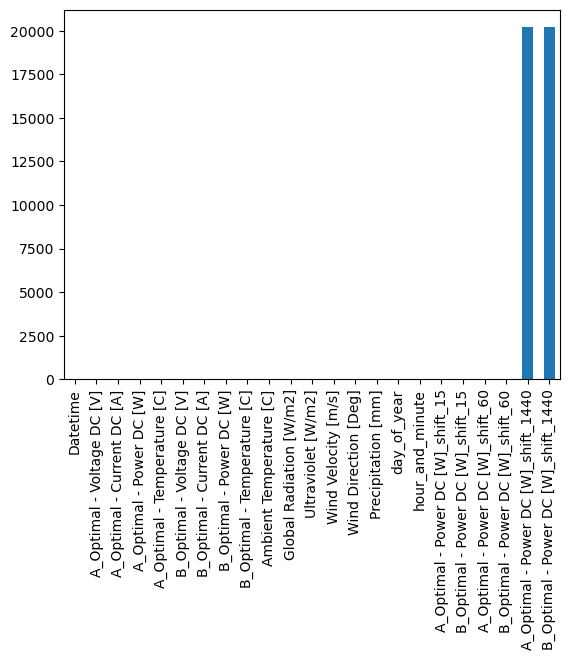

In [35]:
# display(df.head(10))
# display(df.tail(10))

df.isna().sum().plot.bar()

In [36]:
display(df.head())
display(df.tail())

,Datetime,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [C],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [C],Ambient Temperature [C],...,Wind Direction [Deg],Precipitation [mm],day_of_year,hour_and_minute,A_Optimal - Power DC [W]_shift_15,B_Optimal - Power DC [W]_shift_15,A_Optimal - Power DC [W]_shift_60,B_Optimal - Power DC [W]_shift_60,A_Optimal - Power DC [W]_shift_1440,B_Optimal - Power DC [W]_shift_1440
0,2014-01-01 07:41:00,14.6,0.19527,2.850946,9.4,0.00,0.000000,0.000000,9.7,9.7,...,275.33384,0.0,1,7.683,9.204125,5.853375,53.968500,50.405000,NaN,NaN
1,2014-01-01 07:42:00,23.1,0.07250,1.674750,9.4,18.30,0.130512,2.388366,9.7,9.7,...,278.50306,0.0,1,7.700,11.490500,7.816500,57.513250,53.742375,NaN,NaN
2,2014-01-01 07:43:00,23.1,0.07500,1.732500,9.4,22.35,0.052500,1.173375,9.7,9.7,...,284.66712,0.0,1,7.717,13.160000,10.233500,58.007250,54.104750,NaN,NaN
3,2014-01-01 07:44:00,23.1,0.07750,1.790250,9.5,24.35,0.052500,1.278375,9.7,9.7,...,278.66666,0.0,1,7.733,14.718750,11.513250,59.020750,54.782000,NaN,NaN
4,2014-01-01 07:45:00,22.2,0.08250,1.831500,9.5,25.25,0.052500,1.325625,9.7,9.7,...,272.66636,0.0,1,7.750,16.391250,13.000750,56.779125,52.750250,NaN,NaN


,Datetime,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [C],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [C],Ambient Temperature [C],...,Wind Direction [Deg],Precipitation [mm],day_of_year,hour_and_minute,A_Optimal - Power DC [W]_shift_15,B_Optimal - Power DC [W]_shift_15,A_Optimal - Power DC [W]_shift_60,B_Optimal - Power DC [W]_shift_60,A_Optimal - Power DC [W]_shift_1440,B_Optimal - Power DC [W]_shift_1440
834061,2017-12-31 17:14:00,0.0,0.0,0.0,17.6,0.0,0.0,0.0,18.2,16.600000,...,298.33362,0.0,365,17.233,0.0,0.0,0.0,0.0,NaN,NaN
834062,2017-12-31 17:15:00,0.0,0.0,0.0,17.6,0.0,0.0,0.0,18.2,16.600000,...,293.33710,0.0,365,17.250,0.0,0.0,0.0,0.0,NaN,NaN
834063,2017-12-31 17:16:00,0.0,0.0,0.0,17.5,0.0,0.0,0.0,18.1,16.600000,...,286.99006,0.0,365,17.267,0.0,0.0,0.0,0.0,NaN,NaN
834064,2017-12-31 17:17:00,0.0,0.0,0.0,17.4,0.0,0.0,0.0,18.1,16.600000,...,291.67706,0.0,365,17.283,0.0,0.0,0.0,0.0,NaN,NaN
834065,2017-12-31 17:18:00,0.0,0.0,0.0,17.4,0.0,0.0,0.0,18.0,16.550002,...,295.66644,0.0,365,17.300,0.0,0.0,0.0,0.0,NaN,NaN


In [37]:
# The dataframe will be over 100MB if we don't split them up

a_col_list = []
b_col_list = []

# Create list of columns excluding the opposing site
for col_name in df.columns.to_list():
    if 'B_' not in col_name:
        a_col_list.append(col_name)
    if 'A_' not in col_name:
        b_col_list.append(col_name)

df[a_col_list].to_csv('SunLab_Faro_Cleaned_A_features.csv', index=False)
df[b_col_list].to_csv('SunLab_Faro_Cleaned_B_features.csv', index=False)